In [ ]:
pip install scikit-plot

In [ ]:
pip install twilio

In [165]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout
from nltk.chat.util import Chat
from twilio.rest import Client
import os

In [142]:
df_train = pd.read_csv('/content/train.txt', header = None, sep =';', names = ['Text','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/test.txt', header = None, sep =';', names = ['Text','Sentiment'], encoding='utf-8')
df_val = pd.read_csv('/content/val.txt', header = None, sep=';', names = ['Text','Sentiment'], encoding='utf-8')

In [143]:
df_train['Sentiment'] = df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
X = df_train['Text']

In [144]:
tokenizer = Tokenizer(15212, lower = True, oov_token='UNK')
tokenizer.fit_on_texts(X)

In [145]:
X_train = tokenizer.texts_to_sequences(X)
X_train_paded = pad_sequences(X_train, maxlen=80, padding='post')

In [146]:
Y_train = df_train['Sentiment'].values
Y_train_f = to_categorical(Y_train)

In [147]:
model = Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 80, 64)            973568    
                                                                 
 dropout_8 (Dropout)         (None, 80, 64)            0         
                                                                 
 bidirectional_14 (Bidirecti  (None, 80, 160)          92800     
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 320)              410880    
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 6)                 1926      
                                                                 
Total params: 1,479,174
Trainable params: 1,479,174
No

In [148]:
model.compile(optimizer  ='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [149]:
iterations = model.fit(X_train_paded, Y_train_f, epochs=12)

Epoch 1/12
500/500 [==============================] - 289s 485ms/step - loss: 1.2465 - accuracy: 0.5138
Epoch 2/12
500/500 [==============================] - 241s 482ms/step - loss: 0.5321 - accuracy: 0.8115
Epoch 3/12
500/500 [==============================] - 238s 476ms/step - loss: 0.2803 - accuracy: 0.9056
Epoch 4/12
500/500 [==============================] - 239s 478ms/step - loss: 0.1961 - accuracy: 0.9278
Epoch 5/12
500/500 [==============================] - 240s 480ms/step - loss: 0.1533 - accuracy: 0.9438
Epoch 6/12
500/500 [==============================] - 242s 484ms/step - loss: 0.1201 - accuracy: 0.9544
Epoch 7/12
500/500 [==============================] - 239s 477ms/step - loss: 0.1037 - accuracy: 0.9588
Epoch 8/12
500/500 [==============================] - 238s 476ms/step - loss: 0.0869 - accuracy: 0.9653
Epoch 9/12
500/500 [==============================] - 238s 476ms/step - loss: 0.0822 - accuracy: 0.9668
Epoch 10/12
500/500 [==============================] - 237s 473m

In [151]:
model.save('Method_2.h5')
model.save_weights('Method__2.h5')

In [153]:
X_test=df_test['Text']
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [154]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [155]:
Y_test_f = to_categorical(Y_test)

In [157]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 11s 149ms/step - loss: 0.2078 - accuracy: 0.9305


[0.2077958583831787, 0.9304999709129333]

In [158]:
Y_pred = model.predict(X_test_pad) 
Y_pred = np.argmax(Y_pred,axis=1)

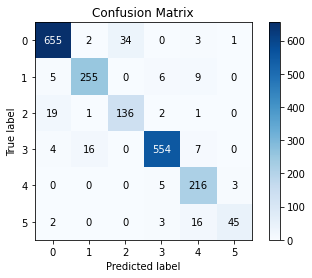

In [159]:
plot_confusion_matrix(Y_test,Y_pred)

In [160]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       695
           1       0.93      0.93      0.93       275
           2       0.80      0.86      0.83       159
           3       0.97      0.95      0.96       581
           4       0.86      0.96      0.91       224
           5       0.92      0.68      0.78        66

    accuracy                           0.93      2000
   macro avg       0.91      0.89      0.89      2000
weighted avg       0.93      0.93      0.93      2000



In [213]:
def get_key(value):
  dictionary = {'joy': 0, 'anger': 1, 'love': 2, 'sadness': 3, 'fear': 4, 'surprise': 5}
  for i, j in dictionary.items():
    if (j == value):
      return i

In [214]:
def predict(sentence):
  sentence_lst = []
  sentence_lst.append(sentence)
  sentence_seq = tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded = pad_sequences(sentence_seq,maxlen=80,padding='post')
  predicted = model.predict(sentence_padded) 
  predicted = np.argmax(predicted, axis=1)
  result = get_key(predicted)
  return result

In [220]:
from IPython.display import clear_output
client = Client('TWILIO SID', 'TWILIO AUTH TOKEN')
input_sentiment = input("Hi :) How are you feeling today ? ")
result = predict(input_sentiment)
if result == "anger" or result == "sadness" or result == "fear":
  print("Hey there, I am here for you. Everyone has a hard time in their life at some point or the other but be assured that there is always hope. Things get better with time.")
  assistance = input("Do you need any assistance ?")
  if assistance == "N" or assistance == "No" or assistance == "no" or assistance == "n":
    print("Bye bye friend!, be assured that I am here to talk to you whenever you need me")
  elif assistance == "Yes" or assistance == "Y" or assistance == 'y' or assistance == 'yes' :
    print("How can I help you ?")
    print("\n")
    print("1. Do you want to get a motivation text message ?")
    print("2. Do want to talk to someone to share your feelings with ?")
    response = input()
    if response == "1":
      msg = client.messages.create(to = 'YOUR NUM', from_= '+17174821114',body = 'Losing does not make you weak. It is more like a challenge whether one can stand up or not. So never give up.')
      print(msg.sid)
    elif response == "2":
      call = client.calls.create(url='http://demo.twilio.com/docs/voice.xml', to = 'YOUR NUM', from_= '+17174821114')
      print(call.sid)
else:
  print("Oh it seems you are happy !! Bye Bye friend, be assured that I am here to talk to you whenever you need me")

Hi :) How are you feeling today ? alone
Hey there, I am here for you. Everyone has a hard time in their life at some point or the other but be assured that there is always hope. Things get better with time.
Do you need any assistance ?yes
How can I help you ?


1. Do you want to get a motivation text message ?
2. Do want to talk to someone to share your feelings with ?
2
CAe4dbde02ca43e9c2c9d3b092c640532d
